# PART1 Introduction

## Motivation

As the global financial market is generating mass data of different types every day, it is becoming more crucial and more **difficult to effectively extract and use these data to predict the trend of stocks**. The short-term timing strategy has a few difficulties, a few of which are listed as follows:

1. Market sentiments strongly influence the short-term market trend;
2. How to extract effective factors;
3. How to build nonlinear factors;
4. How to solve collinearity among factors.

## Our project goal

In this project, we recognize the **price up or down** as a **classification problem** and implement several **machine learning algorithms** to predict the future price up or down of **WindA Index(Y)**([881001.csv](https://github.com/lethe-ye/PHBS_MLD_proj/blob/main/00%20data/881001.csv)), an index indicating the trend of Chinese A Share stocks, to build a **short-term timing strategy**.

## Brief Summary of Dataset

The X (dataset) consists of three parts: **macroeconomic data in china**([cleanedFactor.pkl](https://github.com/lethe-ye/PHBS_MLD_proj/blob/main/00%20data/cleanedFactor.pkl)), **American index indicators** and some alpha factors built using OHLC prices of WindA as in WorldQuant101.
The Y is 0/1 **boolean value indicating fall/rise of windA** in next trading day.
The total number of features is 60.
The time period: from 20080401 to 20200306.
The data can be acquired from Wind Database directly. All factors are based on daily frequency data.

## Dataset sample
Here is a sample of the dataset.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/00%20data/881001.csv "
dataset_sample881001 = pd.read_csv(url,header=3)
dataset_sample881001

,Date,pre_close,open,high,low,close,volume,amt,chg,pct_chg,adjfactor,turn
0,2007-01-04,1449.5112,1449.5112,1500.6626,1449.5112,1461.2643,1.649884e+10,1.167576e+11,11.7531,0.8108,1.0,5.1207
1,2007-01-05,1461.2643,1461.2643,1474.4780,1440.5717,1474.4288,1.447836e+10,9.795108e+10,13.1645,0.9009,1.0,4.5051
2,2007-01-08,1474.4288,1474.4288,1522.0564,1474.4111,1522.0564,1.528236e+10,1.056231e+11,47.6276,3.2302,1.0,4.7331
3,2007-01-09,1522.0564,1522.0564,1565.2524,1521.0320,1564.7432,1.559729e+10,1.082493e+11,42.6868,2.8045,1.0,4.9196
4,2007-01-10,1564.7432,1564.7432,1603.9949,1560.3810,1603.9025,1.663220e+10,1.179622e+11,39.1593,2.5026,1.0,5.1186
...,...,...,...,...,...,...,...,...,...,...,...,...
3207,2020-03-12,4438.8589,4377.8379,4397.2123,4321.8071,4355.2386,7.727666e+10,8.368735e+11,-83.6203,-1.8838,1.0,1.4622
3208,2020-03-13,4355.2386,4146.8225,4345.7211,4145.7856,4305.9950,8.946874e+10,9.663607e+11,-49.2436,-1.1307,1.0,1.6926
3209,2020-03-16,4305.9950,4325.6495,4325.6495,4108.8162,4118.5342,8.717719e+10,9.630109e+11,-187.4608,-4.3535,1.0,1.6493
3210,2020-03-17,4118.5342,4140.0234,4185.3558,3987.4049,4106.6356,7.545368e+10,8.169894e+11,-11.8986,-0.2889,1.0,1.4273


Exploratory data analysis. First, we try to understand the distribution of return data intuitively. We get the quantile data of each character and draw the QQ plot. As the figure shown below, returns follow an asymmetric, non-nomial distribution. And we often notice that group by different year, the distribution of return is varied.

In [2]:
dataset_sample881001.describe()

,pre_close,open,high,low,close,volume,amt,chg,pct_chg,adjfactor,turn
count,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.0,3212.000000
mean,3194.639883,3191.837436,3223.819451,3158.951681,3195.443831,2.918363e+10,3.506011e+11,0.803948,0.048853,1.0,1.364295
std,1009.833891,1008.607329,1017.799611,997.905878,1009.471966,2.089827e+10,2.951901e+11,63.425061,1.836786,0.0,1.111510
min,1224.897700,1224.897700,1242.516400,1207.425700,1224.897700,4.414393e+09,3.217147e+10,-544.243200,-9.701500,1.0,0.298900
25%,2333.099650,2332.406125,2351.325625,2313.993975,2333.259900,1.440915e+10,1.577067e+11,-21.938300,-0.722725,1.0,0.692175
50%,2880.669700,2881.101550,2907.745200,2847.228750,2881.601450,2.300162e+10,2.537148e+11,3.903650,0.124150,1.0,0.952650
75%,4103.054250,4095.434025,4125.321625,4064.802400,4103.054250,3.712173e+10,4.503586e+11,29.461425,0.968425,1.0,1.610800
max,7224.264400,7252.406000,7257.794700,7137.195600,7224.264400,1.300450e+11,2.357610e+12,347.261100,9.422400,1.0,8.125200


In [3]:
dataset_sample881001['year'] = pd.to_datetime(dataset_sample881001.Date).dt.year

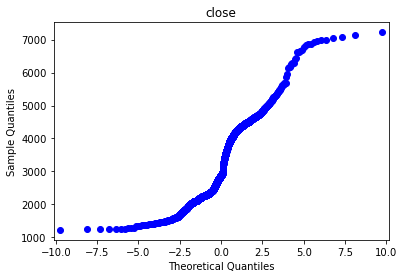

In [4]:
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt
fig = sm.qqplot(dataset_sample881001.close, stats.t, distargs=(4,))
plt.title("close")
plt.show()

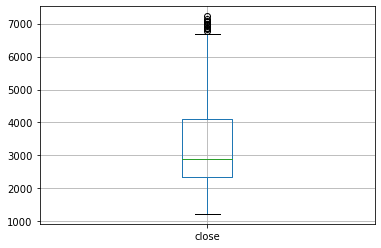

In [5]:
dataset_sample881001.boxplot('close')

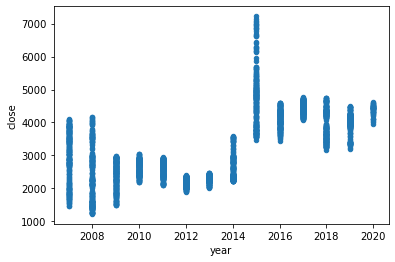

In [6]:
dataset_sample881001.plot(kind='scatter', x='year', y='close')

In [7]:
url = "https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/00%20data/cleanedFactor.pkl"
dataset_sample_cleanedFactor = pd.read_pickle(url)
dataset_sample_cleanedFactor

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5,ETFReturn,ETFTomorrowUp,windAReturn,windATomorrowUp
date,,,,,,,,,,,,,,,,,,,,,
2008-04-01,2.5561,3.0938,3.0937,0.249621,0.298171,0.298238,2.5914,3.1008,2.9951,3.3039,...,0.000623,0.116756,0.061890,8.132457e+09,0.044804,-0.095947,-0.038328,1.0,-0.040655,0.0
2008-04-02,2.3647,3.1501,3.1493,0.138901,0.279592,0.280464,2.3718,3.1539,3.6907,3.3183,...,0.000622,0.130007,0.063483,9.233396e+09,0.347541,-0.097819,0.010870,1.0,-0.018631,1.0
2008-04-03,2.3489,2.7830,2.7917,0.129768,0.166974,0.171162,2.3610,2.7796,3.6332,3.3685,...,0.000630,0.122711,0.055455,7.351010e+09,-0.074038,-0.047096,0.028674,1.0,0.026610,1.0
2008-04-07,2.3274,3.2303,3.2330,0.028458,0.351138,0.354931,2.3238,3.2093,3.5210,3.5117,...,0.000646,0.096784,0.043617,8.805947e+09,-0.040062,-0.034606,0.040329,0.0,0.042579,1.0
2008-04-08,2.3486,3.5846,3.5853,0.023846,0.240174,0.240288,2.3385,3.4941,3.9874,3.6742,...,0.000638,0.087797,0.023199,9.586918e+09,0.385330,0.012665,-0.003344,0.0,0.013138,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,1.7859,2.2903,2.2843,0.115769,-0.019605,-0.022048,1.7140,2.1290,2.0510,2.2700,...,0.000135,0.176575,0.102845,8.000775e+10,-0.092354,-0.025796,0.032028,1.0,0.035995,1.0
2020-03-03,1.6923,2.2427,2.2410,0.011839,-0.040556,-0.041447,1.6220,2.0940,1.9900,2.2290,...,0.000135,0.167128,0.099200,8.000775e+10,-0.136910,-0.017754,0.003448,1.0,0.009004,1.0
2020-03-04,1.5416,2.1684,2.1635,-0.021393,-0.068637,-0.068902,1.4620,2.0520,1.9640,2.1740,...,0.000135,0.163673,0.116832,8.000775e+10,-0.250106,0.005961,0.010309,1.0,0.005218,1.0


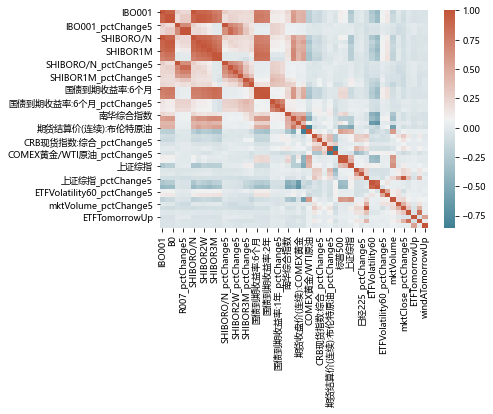

In [8]:
# calculate correlation matrix
import warnings
warnings.filterwarnings("ignore")
from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
mpl.rcParams['font.size'] = 9 
import seaborn as sns
corr = dataset_sample_cleanedFactor.corr()
sns.heatmap(corr, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Work Flow

We plan to implement a feature selection to choose certain features (factors) out of 52 daily factor data and some alpha factors from WorldQuant101 to establish classifiers using logistic regression, naive Bayes, KNN, perceptron, decision tree, SVM, XGBoost and a Sequential neural network model in Keras to predict the rise or fall of Wind All A Index the next day. We build our models and renew them, using them to predict the price up or down of the next trading days. Next we calculate the long-short net asset value (NAV) of WindA based on the position we hold according to the predictions. After that we do some tests and assessments on the strategy. The whole work flow is shown in the following figure.
![images](https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/01%20proposalMaterials/workFlow.PNG)


## Rolling Prediction

As the financial data are time series data, we implement an **expanding window** training and prediction procedure as follows: 

1. We get at least 1800 days' data as the training dataset and use k-fold cross validation method to tune the hyperparameters for the best model, so the first signal we can get is the 1801 day.
2. The signal is the predict results of the up or down of WindA Index in the next day. If the signal is predicted to be 1, then we buy WindA Index at the close of the day. If it is predicted as 0, then we short WindA or do nothing at the close of the day.
3. We use the best model in Step 2 for 20 consecutive trading days and then add the 20 days' data into the training set in Step 1 to enter Step 1 again.
![images](https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/01%20proposalMaterials/expand.png)
As we can see from the figure above, every 20 consecutive trading days the training dataset will expand 20 more days' data.

# PART2 Data Preprocessing and Feature Selection

## Data Collection

The goal of our timing model is to forecast Wind All A Index, using 60 factors including interest rate factors, commodity factors and other factors. And the time range of our data is from April 1, 2008 to March 6, 2020. All raw data are collected in the [rawMacroFactor](https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/00%20data/rawMacroFactor). 

Except for the factors chosen in our reference research report, we add two kinds of features. One of them is Shanghai Composite Index, which is a good indicator that reflects Chinese stock market expectations. The other are stock indexes of foreign stock market, including Nikkei Index and three American stock indexes, because we believe that the volatility of foreign stock prices can have a significant influence on Chinese market. All new factors are collected in the [newData](https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/00%20data/newData). We list a few of these factors in the following table.

|                  Name(Chinese)                  |                             Name                             |                          Frequency                           |
| :---------------------------------------------: | :----------------------------------------------------------: | :----------------------------------------------------------: |
|  银行间同业拆借加权利率：1天：过去五天的变化率  | Interbank Offered Rate: 1 day: Change rate in   the past five days |                              D                               |
|                  7天期回购利率                  |                       7-day repo rate                        |                              D                               |
|         7天期回购利率：过去五天的变化率         |      7-day repo rate: Change rate in the past five days      |                              D                               |
|             银行间回购加权利率：7天             |        Interbank repo weighted interest rate: 7 days         |                              D                               |
|    银行间回购加权利率：7天：过去五天的变化率    | Interbank repo weighted interest rate: 7 days: Change rate in the past five days |                              D                               |
|                shibor利率（0N）                 |                         shibor（0N）                         |                              D                               |
|                shibor利率（1W）                 |                         shibor（1W）                         |                              D                               |
|                shibor利率（2W）                 |                         shibor（2W）                         |                              D                               |
|                shibor利率（1M）                 |                         shibor（1M）                         |                              D                               |
|                shibor利率（3M）                 |                         shibor（3M）                         |                              D                               |
|                shibor利率（6M）                 |                         shibor（6M）                         |                              D                               |
|       shibor利率（0N）：过去五天的变化率        |       shibor（0N）: Change rate in the past five days        |                              D                               |
|       shibor利率（1W）：过去五天的变化率        |       shibor（1W）: Change rate in the past five days        |                              D                               |
|       shibor利率（2W）：过去五天的变化率        |       shibor（2W）: Change rate in the past five days        |                              D                               |
|       shibor利率（1M）：过去五天的变化率        |       shibor（1M）: Change rate in the past five days        |                              D                               |
|       shibor利率（3M）：过去五天的变化率        |       shibor（3M）: Change rate in the past five days        |                              D                               |
|       shibor利率（6M）：过去五天的变化率        |       shibor（6M）: Change rate in the past five days        |                              D                               |
|            中债国债到期收益率（0年）            |                  Government Bond YTM（0Y）                   |                              D                               |
|   中债国债到期收益率（0年）：过去五天的变化率   | Government Bond YTM（0Y）: Change rate in the past five days |                              D                               |
|            中债国债到期收益率（3年）            |                  Government Bond YTM（3Y）                   |                              D                               |
|   中债国债到期收益率（3年）：过去五天的变化率   | Government Bond YTM（3Y）: Change rate in the past five days |                              D                               |
|                    南华指数                     |                             NHCI                             |                              D                               |
|           南华指数：过去五天的变化率            |          NHCI: Change rate   in the past five days           |                              D                               |
|                CRB现货指数：综合                |                             CRB                              |                              D                               |
|       CRB现货指数：综合：过去五天的变化率       |            CRB: Change rate in the past five days            |                              D                               |
|          期货收盘价（连续）：COMEX黄金          |        Futures closing price (continuous): COMEX Gold        |                              D                               |
| 期货收盘价（连续）：COMEX黄金：过去五天的变化率 | Futures closing price (continuous): COMEX Gold: Change   rate in the past five days |                              D                               |
|           期货结算价（连续）：WTI原油           |     Futures settlement price (continuous): WTI Crude Oil     |                              D                               |
|  期货结算价（连续）：WTI原油：过去五天的变化率  | Futures settlement price (continuous): WTI Crude Oil: Change rate in the past five days |                              D                               |
|                COMEX黄金/WTI原油                |                  COMEX Gold/ WTI Crude Oil                   |                              D                               |
|       COMEX黄金/WTI原油：过去五天的变化率       | COMEX Gold/ WTI Crude Oil: Change rate in the   past five days |                              D                               |
|                     标普500                     |                          S & P 500                           |                              D                               |
|            标普500：过去五天的变化率            |         S & P 500: Change rate in the past five days         |                              D                               |
|                 市场动量指标RSI                 |                  Market momentum indicator                   | RSI=Sum(Max(Close-LastClose,0),N,1)/Sum(ABS(Close-LastClose),N,1)*100 |
|         市场动量指标：过去五天的收益率          | Market momentum indicator: Change rate in the past five days |                              D                               |
|           市场交易活跃指标（成交量）            |                            Volume                            |                              D                               |
|    市场交易活跃指标：过去五天成交量的变化率     |          Volume: Change rate in the past five days           |                              D                               |
|                 Beta分离度指标                  |                    Beta resolution index                     | beta is calculated by CAPM, then calculate the difference between 90% percentile and 10% percentile of beta |
|        Beta分离度指标：过去五天的变化率         |   Beta resolution index: Change rate in the past five days   |                              D                               |
|              50ETF过去60日的波动率              |            50ETF volatility over the past 60 days            |                              D                               |
|     50ETF过去60日的波动率：过去五天的变化率     | 50ETF volatility over the past 60 days: Change   rate in the past five days |                              D                               |
|             50ETF过去120日的波动率              |            50ETF volatility over the past 60 days            |                              D                               |
|    50ETF过去120日的波动率：过去五天的变化率     | 50ETF volatility over the past 60 days: Change rate in the past five days |                              D                               |
|           银行间同业拆借加权利率：1天           |                Interbank Offered Rate: 1 day                 |                              D                               |
|   日经225指数   |   Nikki   |   D   |
|   道琼斯工业指数  |  DJIA   |  D   |
|   10年期美债收益率  |  YTM of 10- year Treasury  |   D  |

## Label Generation

We compute the daily return of WindA index and label each day based on the return. If the return of the next day is positive, which means the price goes up, we label this day 1; else we label this day 0.

## Tackle with NaN

Then we compute the number of NaN in each factor. After we drop NaN including non-trading day data and other missing data, we get a DataFrame including 2,903 observations. Cleaned factors are in the [cleanedFactor](https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/02%20dataProcess/cleanedFactor.pkl).

In [9]:
import pandas as pd
import numpy as np
import plotly
import os
import matplotlib.pyplot as plt
X_df = pd.read_pickle('https://raw.githubusercontent.com/lethe-ye/PHBS_MLD_proj/main/02%20dataProcess/factor.pkl')
X_df.head()

,IBO001,R007,B0,IBO001_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,...,ETFVolatility120,ETFVolatility60_pctChange5,ETFVolatility120_pctChange5,mktVolume,mktVolume_pctChange5,mktClose_pctChange5,ETFReturn,ETFTomorrowUp,windAReturn,windATomorrowUp
date,,,,,,,,,,,,,,,,,,,,,
2007-09-03,1.8289,2.4612,2.4713,NaN,NaN,NaN,1.8197,2.4963,2.7768,2.9081,...,NaN,NaN,NaN,1.934243e+10,NaN,NaN,NaN,0.0,NaN,0.0
2007-09-04,1.8828,2.1780,2.1805,NaN,NaN,NaN,1.8860,2.2348,2.7740,2.9625,...,NaN,NaN,NaN,1.833770e+10,NaN,NaN,-0.016827,0.0,-0.009198,1.0
2007-09-05,1.8201,2.3618,2.3678,NaN,NaN,NaN,1.8122,2.3683,2.9631,3.0903,...,NaN,NaN,NaN,1.494567e+10,NaN,NaN,-0.002445,1.0,0.002539,1.0
2007-09-06,1.8173,2.4748,2.4389,NaN,NaN,NaN,1.8198,2.4385,3.2259,3.2956,...,NaN,NaN,NaN,1.626460e+10,NaN,NaN,0.012255,0.0,0.010107,0.0
2007-09-07,2.0160,2.8528,2.8629,NaN,NaN,NaN,2.0446,2.8066,3.5218,3.4738,...,NaN,NaN,NaN,1.825542e+10,NaN,NaN,-0.016949,1.0,-0.021509,1.0


IBO001                          211
R007                            211
B0                              212
IBO001_pctChange5               216
R007_pctChange5                 216
B0_pctChange5                   216
SHIBORO/N                       212
SHIBOR1W                        212
SHIBOR2W                        212
SHIBOR1M                        212
SHIBOR3M                        212
SHIBOR6M                        212
SHIBORO/N_pctChange5            216
SHIBOR1W_pctChange5             216
SHIBOR2W_pctChange5             216
SHIBOR1M_pctChange5             216
SHIBOR3M_pctChange5             216
SHIBOR6M_pctChange5             216
国债到期收益率:6个月                     390
国债到期收益率:1年                      363
国债到期收益率:2年                      361
国债到期收益率:6个月_pctChange5          287
国债到期收益率:1年_pctChange5           287
国债到期收益率:2年_pctChange5           287
南华综合指数                          293
CRB现货指数:综合                      190
期货收盘价(连续):COMEX黄金               255
期货结算价(连续):布伦特原油             

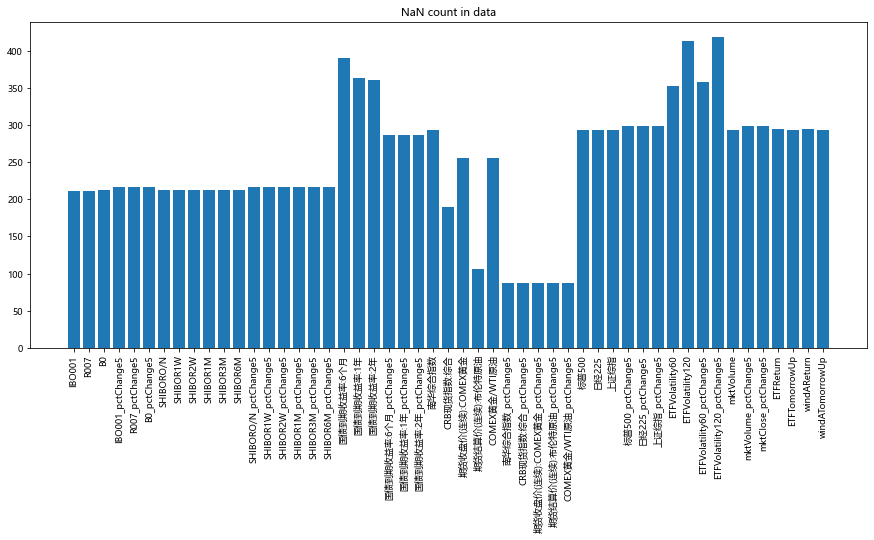

In [10]:
nas_df = X_df.isna()
print(X_df.isna().sum())

plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

国债到期收益率:6个月           29
国债到期收益率:1年             2
国债到期收益率:2年             1
CRB现货指数:综合            97
期货收盘价(连续):COMEX黄金    159
期货结算价(连续):布伦特原油       22
COMEX黄金/WTI原油        159
dtype: int64


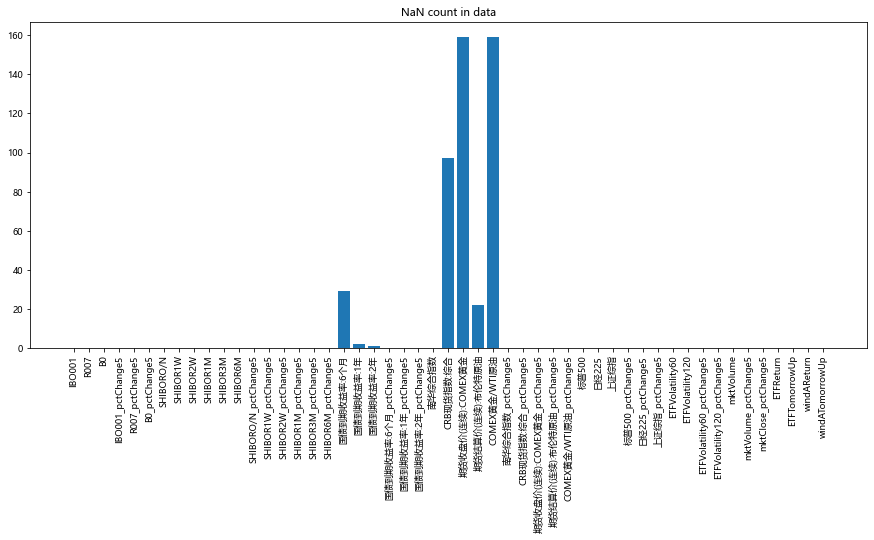

In [11]:
XDroped_df = X_df.loc['2008-04':].dropna(axis = 0, thresh=35)

print(XDroped_df.isna().sum()[XDroped_df.isna().sum()>0])
nas_df = XDroped_df.isna()
plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

In [12]:
XFilled_df = XDroped_df.fillna(method = 'ffill')
print(np.isfinite(XFilled_df).all())
for aColumn in XFilled_df.columns:
    print(aColumn, XFilled_df[~np.isposinf(XFilled_df)].max()[aColumn])
    XFilled_df.loc[np.isinf(XFilled_df)[aColumn], aColumn] = XFilled_df[~np.isposinf(XFilled_df)].max()[aColumn]

IBO001                          True
R007                            True
B0                              True
IBO001_pctChange5               True
R007_pctChange5                 True
B0_pctChange5                   True
SHIBORO/N                       True
SHIBOR1W                        True
SHIBOR2W                        True
SHIBOR1M                        True
SHIBOR3M                        True
SHIBOR6M                        True
SHIBORO/N_pctChange5            True
SHIBOR1W_pctChange5             True
SHIBOR2W_pctChange5             True
SHIBOR1M_pctChange5             True
SHIBOR3M_pctChange5             True
SHIBOR6M_pctChange5             True
国债到期收益率:6个月                     True
国债到期收益率:1年                      True
国债到期收益率:2年                      True
国债到期收益率:6个月_pctChange5          True
国债到期收益率:1年_pctChange5           True
国债到期收益率:2年_pctChange5           True
南华综合指数                          True
CRB现货指数:综合                      True
期货收盘价(连续):COMEX黄金               True
期

In [13]:
# import pandas_profiling 
# import warnings
# warnings.filterwarnings("ignore")
# profile = pandas_profiling.ProfileReport(XFilled_df)
# profile.to_file("Report.html")
# profile